# Mean Reversion
Calculate the SMA 
SMA +- 2*Standard Diviation 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
Year = 252 # trading days on a year

In [2]:
data = pd.read_csv("GBPEUR=X.cvs",parse_dates= ["Date"],index_col=["Date"])

<AxesSubplot:title={'center':'GBP/EUR'}, xlabel='Date'>

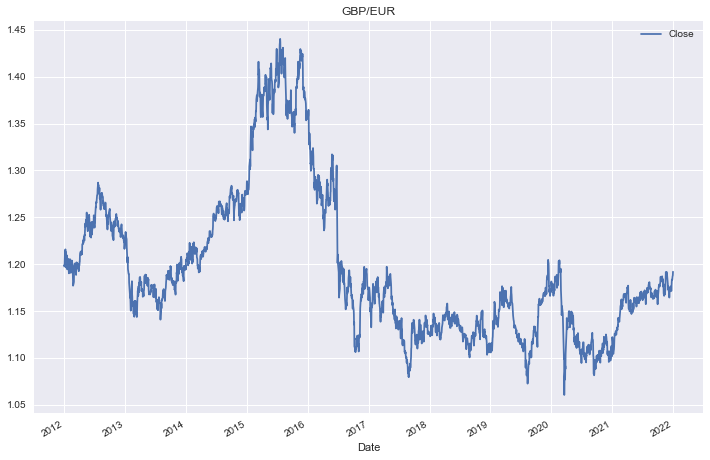

In [3]:
data.plot(figsize = (12,8), title = "GBP/EUR")

<AxesSubplot:title={'center':'GBP/EUR'}, xlabel='Date'>

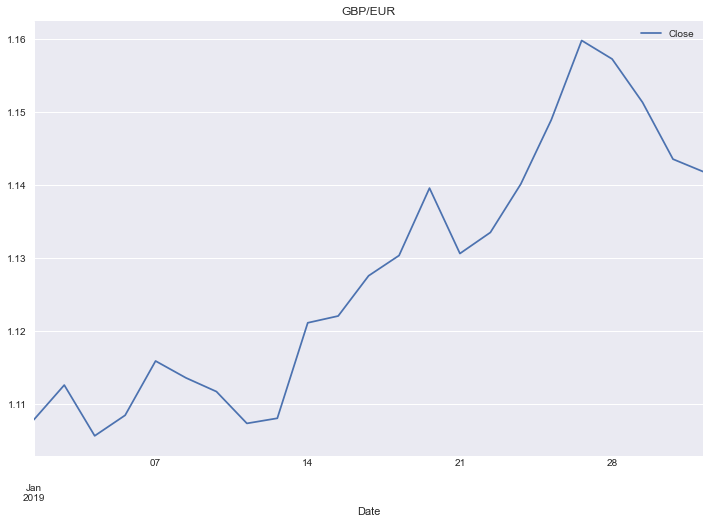

In [4]:
data.loc["2019-01"].plot(figsize = (12,8), title = "GBP/EUR")

In [5]:
data["Returns"] = np.log(data.div(data.shift(1))) #Buy and Hold Strategy

In [6]:
data

,Close,Returns
Date,,
2012-01-02,1.19740,NaN
2012-01-03,1.19910,0.001419
2012-01-04,1.19820,-0.000751
2012-01-05,1.20670,0.007069
2012-01-06,1.21130,0.003805
...,...,...
2021-12-27,1.18344,0.000034
2021-12-28,1.18629,0.002405
2021-12-29,1.18710,0.000683


In [7]:
SMA_Period = 30 #length of the SMA
std = 2 # Constant of SMA multiplication

<AxesSubplot:xlabel='Date'>

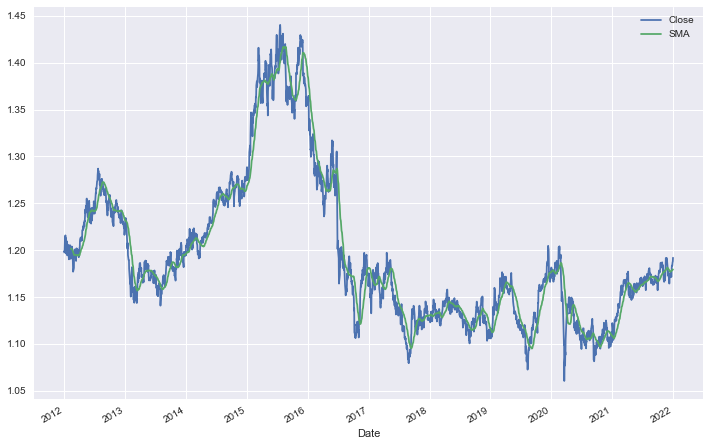

In [8]:
#SMA calculation and plotting
data["SMA"] = data["Close"].rolling(SMA_Period).mean()
data[["Close","SMA"]].plot(figsize=(12,8))

In [9]:
#Standard diviation
i=data["Close"].rolling(SMA_Period).std()*std

In [10]:
#Standard Diviation plus or minus
data["Low"]=data["SMA"] - i
data["High"]=data["SMA"] + i

In [11]:
data

,Close,Returns,SMA,Low,High
Date,,,,,
2012-01-02,1.19740,NaN,NaN,NaN,NaN
2012-01-03,1.19910,0.001419,NaN,NaN,NaN
2012-01-04,1.19820,-0.000751,NaN,NaN,NaN
2012-01-05,1.20670,0.007069,NaN,NaN,NaN
2012-01-06,1.21130,0.003805,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-27,1.18344,0.000034,1.178910,1.163885,1.193934
2021-12-28,1.18629,0.002405,1.179139,1.163875,1.194404
2021-12-29,1.18710,0.000683,1.179179,1.163835,1.194523


<AxesSubplot:title={'center':'Mean Reversion 2012-2022'}, xlabel='Date'>

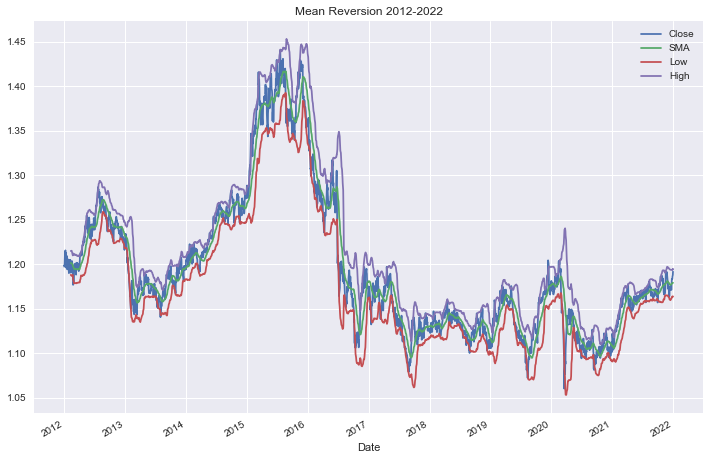

In [12]:
data.drop(columns="Returns").plot(figsize=(12,8),title = "Mean Reversion 2012-2022")

<AxesSubplot:title={'center':'Mean Reversion Jan-2019'}, xlabel='Date'>

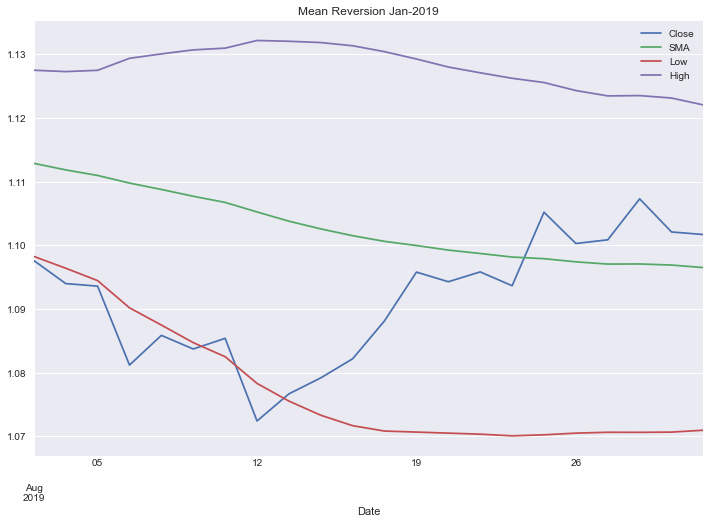

In [13]:
data.drop(columns="Returns").loc["2019-08"].plot(figsize=(12,8),title = "Mean Reversion Jan-2019")

In [14]:
data.dropna(inplace=True)

In [15]:
data

,Close,Returns,SMA,Low,High
Date,,,,,
2012-02-10,1.19060,-0.002265,1.201563,1.188134,1.214992
2012-02-13,1.19190,0.001091,1.201380,1.187571,1.215189
2012-02-14,1.19510,0.002681,1.201247,1.187270,1.215223
2012-02-15,1.19480,-0.000251,1.201133,1.187000,1.215266
2012-02-16,1.20110,0.005259,1.200947,1.186971,1.214922
...,...,...,...,...,...
2021-12-27,1.18344,0.000034,1.178910,1.163885,1.193934
2021-12-28,1.18629,0.002405,1.179139,1.163875,1.194404
2021-12-29,1.18710,0.000683,1.179179,1.163835,1.194523


In [16]:
data["Separation"] = data.Close - data.SMA # Space between price and SMA

In [17]:
data["Indicator"] = np.where(data.Close < data.Low,1,np.nan) # Buy

In [18]:
data["Indicator"] = np.where(data.Close > data.High, -1,data["Indicator"]) # Sell

In [19]:
data

,Close,Returns,SMA,Low,High,Separation,Indicator
Date,,,,,,,
2012-02-10,1.19060,-0.002265,1.201563,1.188134,1.214992,-0.010963,NaN
2012-02-13,1.19190,0.001091,1.201380,1.187571,1.215189,-0.009480,NaN
2012-02-14,1.19510,0.002681,1.201247,1.187270,1.215223,-0.006147,NaN
2012-02-15,1.19480,-0.000251,1.201133,1.187000,1.215266,-0.006333,NaN
2012-02-16,1.20110,0.005259,1.200947,1.186971,1.214922,0.000153,NaN
...,...,...,...,...,...,...,...
2021-12-27,1.18344,0.000034,1.178910,1.163885,1.193934,0.004530,NaN
2021-12-28,1.18629,0.002405,1.179139,1.163875,1.194404,0.007151,NaN
2021-12-29,1.18710,0.000683,1.179179,1.163835,1.194523,0.007921,NaN


In [20]:
data["Indicator"] = np.where(data.Separation * data.Separation.shift(1) < 0,0, data["Indicator"]) # Maintain Neutral

In [21]:
data.Indicator= data.Indicator.ffill().fillna(0)

In [22]:
data.Indicator.value_counts()

 0.0    1276
-1.0     658
 1.0     645
Name: Indicator, dtype: int64

<AxesSubplot:xlabel='Date'>

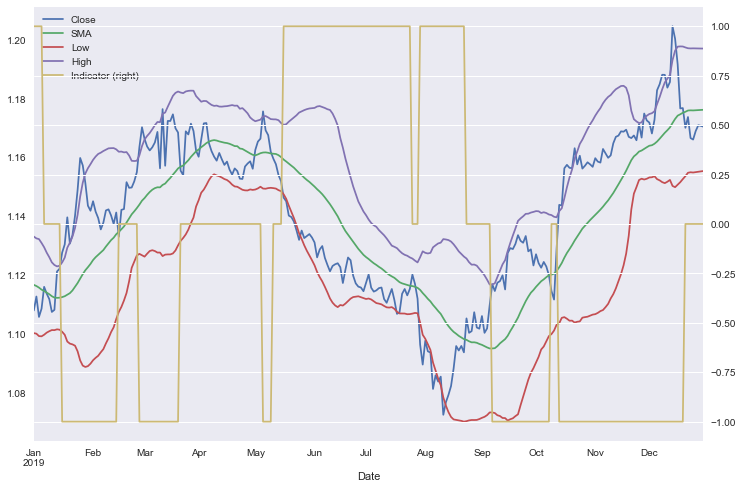

In [23]:
data.drop(columns= [ "Returns", "Separation"]).loc["2019"].plot(figsize= (12,8), secondary_y = "Indicator")

<AxesSubplot:xlabel='Date'>

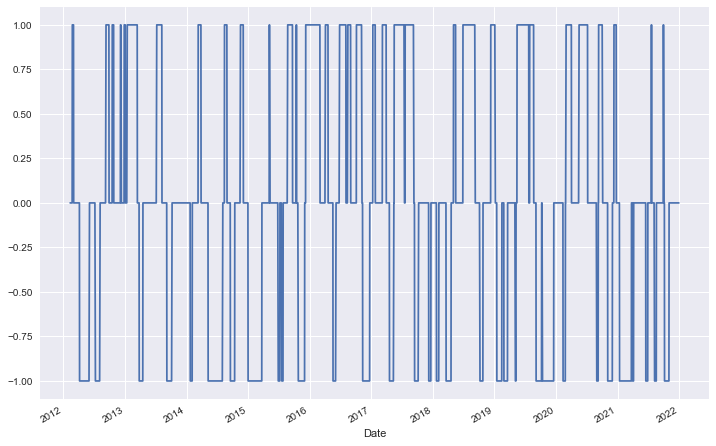

In [24]:
data.Indicator.plot(figsize= (12,8))

## Vectorised Testing

In [25]:
data["Mean_Reversion"] = data.Indicator.shift(1)*data["Returns"]

In [26]:
data.dropna(inplace = True)

In [27]:
data["CumulativeReturns"]= data["Returns"].cumsum().apply(np.exp) # cumulative returns of buy and hold
data["CumulativeMR"]= data["Mean_Reversion"].cumsum().apply(np.exp) # cumulative returns of Mean Reversion

<AxesSubplot:title={'center':'GBP/EUR --- Cummulative'}, xlabel='Date'>

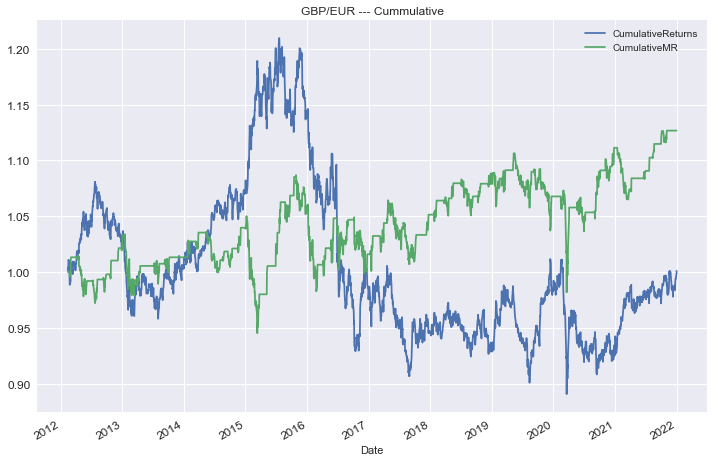

In [28]:
data[["CumulativeReturns","CumulativeMR"]].plot(figsize =(12,8),title = "GBP/EUR --- Cummulative", fontsize = 12)

In [29]:
data

,Close,Returns,SMA,Low,High,Separation,Indicator,Mean_Reversion,CumulativeReturns,CumulativeMR
Date,,,,,,,,,,
2012-02-13,1.19190,0.001091,1.201380,1.187571,1.215189,-0.009480,0.0,0.0,1.001092,1.000000
2012-02-14,1.19510,0.002681,1.201247,1.187270,1.215223,-0.006147,0.0,0.0,1.003780,1.000000
2012-02-15,1.19480,-0.000251,1.201133,1.187000,1.215266,-0.006333,0.0,-0.0,1.003528,1.000000
2012-02-16,1.20110,0.005259,1.200947,1.186971,1.214922,0.000153,0.0,0.0,1.008819,1.000000
2012-02-17,1.20370,0.002162,1.200693,1.187228,1.214159,0.003007,0.0,0.0,1.011003,1.000000
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.18344,0.000034,1.178910,1.163885,1.193934,0.004530,0.0,0.0,0.993986,1.126736
2021-12-28,1.18629,0.002405,1.179139,1.163875,1.194404,0.007151,0.0,0.0,0.996380,1.126736
2021-12-29,1.18710,0.000683,1.179179,1.163835,1.194523,0.007921,0.0,0.0,0.997060,1.126736


In [30]:
#Annual Return
annual_return = data[["Returns","Mean_Reversion"]].mean()*Year
annual_return

Returns           0.000098
Mean_Reversion    0.011664
dtype: float64

In [31]:
#Annual Risk
annual_risk = data[["Returns","Mean_Reversion"]].std()*np.sqrt(Year)
annual_risk

Returns           0.079029
Mean_Reversion    0.057274
dtype: float64

In [32]:
#log absolute performance
data[["Returns","Mean_Reversion"]].sum().apply(np.exp)

Returns           1.001008
Mean_Reversion    1.126736
dtype: float64

In [33]:
#absolute performance
data[["Returns","Mean_Reversion"]].sum() 

Returns           0.001007
Mean_Reversion    0.119325
dtype: float64